# Задача 1 <br>
Выполнила: Борисова Мария, 120М группа

Задание: выделить по спектрам к какому эталонному элементу относится образец (U, Th, K)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузка данных

In [3]:
df_k = pd.read_csv('K.csv', header=None)
df_th = pd.read_csv('Th.csv', header=None)
df_u = pd.read_csv('U.csv', header=None)

df_quest = pd.read_csv('quest.csv', sep=';')
df_quest

,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5,47.5,...,212.5,217.5,222.5,227.5,232.5,237.5,242.5,247.5,252.5,257.5
0,0.675237,0.675237,0.675237,2.700946,3.376183,1.350473,2.025710,4.051419,5.401892,5.401892,...,7.427602,4.051419,4.051419,4.051419,2.025710,0.675237,1.350473,2.025710,0.675237,0.000000
1,4.559822,2.442293,3.148136,4.828269,3.741347,5.178742,3.091820,8.301169,8.950696,12.732666,...,13.454201,6.889482,7.595326,6.183639,3.091820,1.736450,4.884585,3.091820,2.442293,0.705843
2,4.710740,3.828269,2.649527,1.470785,6.774068,5.153033,6.774068,7.802560,13.694157,15.912187,...,18.847190,11.632944,4.562604,5.447190,4.564719,3.534112,1.764942,4.564719,6.774068,4.712855
3,7.190651,2.588314,0.527101,4.602337,4.409572,5.153033,7.477796,7.214246,17.760267,22.362604,...,24.447412,11.806900,7.637284,4.385977,5.153033,4.889482,6.903506,6.687145,6.710740,7.717752
4,7.447190,3.656539,5.583639,4.588314,7.080134,9.141347,7.355481,8.011909,21.882805,23.139232,...,26.562827,17.916082,8.534669,7.313077,3.557707,4.355370,6.882471,5.618920,3.790651,2.661213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Визуализация данных

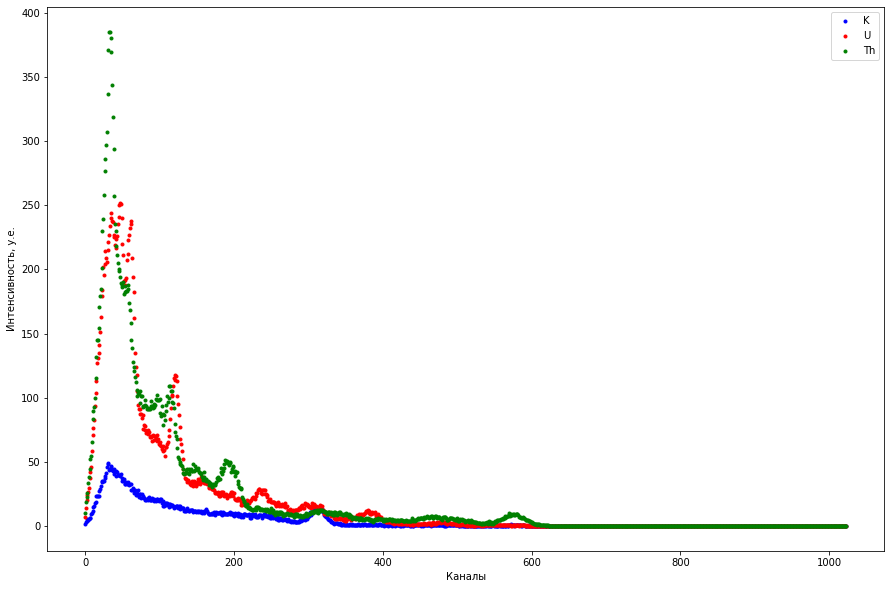

In [4]:
x = [i for i in range(1024)]

plt.figure(figsize=(15, 10))
plt.plot(x, df_k, 'b.', x, df_u, 'r.', x, df_th, 'g.')
plt.xlabel('Каналы')
plt.ylabel('Интенсивность, у.е.')
plt.legend(['K', 'U', 'Th'])
plt.show()

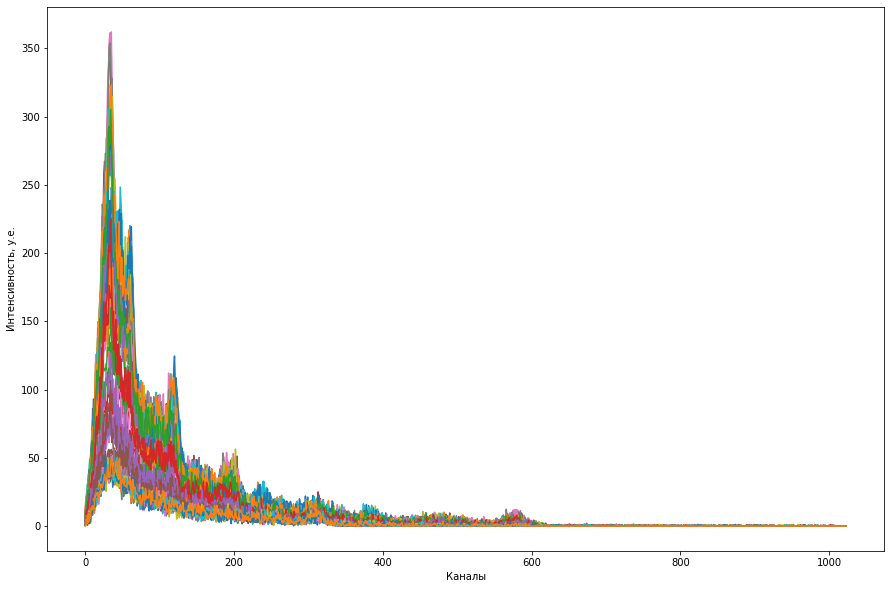

In [5]:
x = [i for i in range(1024)]
y = lambda column: df_quest[column]
columns = df_quest.columns

plt.figure(figsize=(15, 10))
names = []
for i in columns:
    
    plt.plot(x, y(i))
    names += [i]


plt.xlabel('Каналы')
plt.ylabel('Интенсивность, у.е.')
#plt.legend(names)
plt.show()

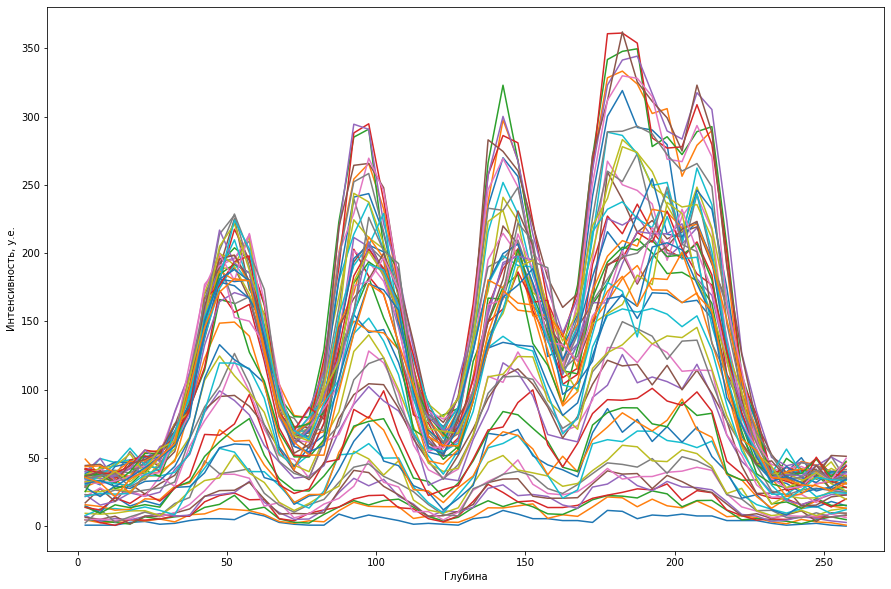

In [6]:
x = df_quest.columns.astype(float)
y = lambda n: df_quest.iloc[n]

plt.figure(figsize=(15, 10))
names = []
for i in range(len(df_quest.columns)):
    plt.plot(x, y(i))

plt.xlabel('Глубина')
plt.ylabel('Интенсивность, у.е.')
plt.show()

Определение концентрации ЕРЭ

$S = C_kS^k + C_uS^k + C_{th} S^{th} $ 

где $S^k,S^u,S^{th}$ – элементарные спектры калия, урана и тория соответственно, <br>
$C_k,C_u,C_{th}$ – концентрации калия, урана и тория в исследуемом образце.


для каждого i-го канала: 
$S_i=C_k S_i^k+C_u S_i^u+C_{th} S_i^{th}$ , <br> 
где i – номер канала, 1 .. n, где n – количество каналов спектрометра. 


S=A∙C  в матричном виде <br>
где S – измеренный спектр (вектор-столбец [1,n]); A – элементарные спектры K, Th, U (матрица [3,n]); 
C – концентрации K,Th,U (вектор-столбец [1,3]). <br>
Решение данной системы можно получить методом наименьших квадратов: <br>
$C=(A^t A)^{(-1)} (A^t S)$


In [7]:
a = np.hstack([df_k, df_u, df_th])
a_T = a.T
reverse_matrix = np.linalg.inv(a_T.dot(a))

s = np.array(df_quest[columns])
reverse_matrix.dot(a_T.dot(s))
#a
#a_T
#reverse

array([[ 5.99663038e-01,  7.08647831e-01,  7.19124411e-01,
         6.83494203e-01,  6.14281716e-01,  6.59887659e-01,
         6.99273837e-01,  5.50961329e-01,  1.02734093e-01,
        -3.45985479e-02, -2.58670878e-02,  2.03522814e-01,
         2.94557993e-01,  8.16623590e-01,  9.38544156e-01,
         9.36001199e-01,  9.15841993e-01,  4.91650175e-01,
         1.35880571e-01,  1.08914650e-01,  6.00031692e-02,
         2.12859379e-01,  6.03860713e-01,  8.76447288e-01,
         8.27412108e-01,  9.61160484e-01,  8.50727379e-01,
         1.71911608e-01,  1.83376485e-01,  4.43076137e-02,
         9.64240812e-02,  4.26445554e-01,  7.89727471e-01,
         6.49588922e-01,  3.95482152e-01, -5.37720567e-02,
         4.12999258e-02,  1.24254792e-02,  1.21066016e-01,
         8.30734448e-02,  1.23432664e-01, -5.34635431e-02,
         7.93639335e-02,  4.27177232e-01,  5.89953487e-01,
         6.21860089e-01,  6.04769303e-01,  7.11230706e-01,
         6.97173876e-01,  6.79504556e-01,  6.32180924e-0

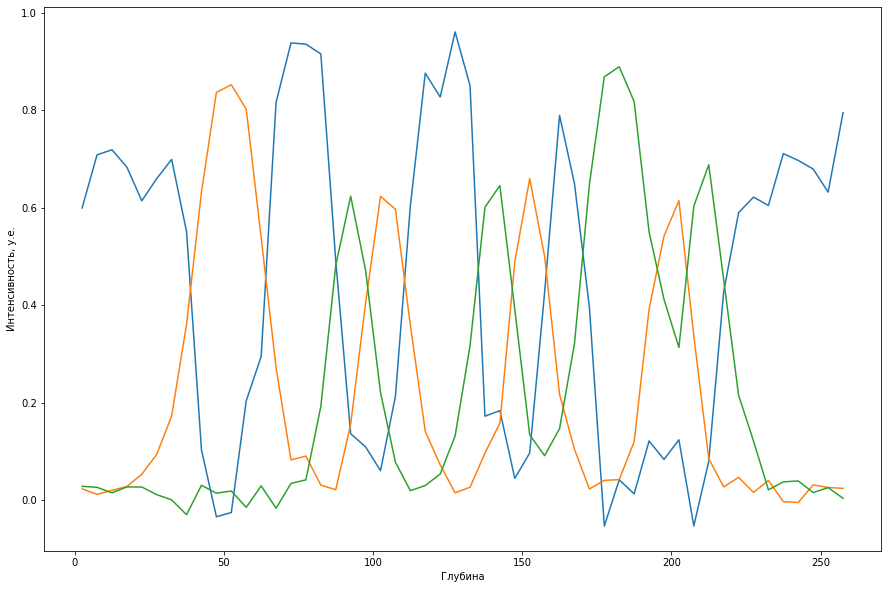

In [8]:
x = df_quest.columns.astype(float)
y = reverse_matrix.dot(a_T.dot(s))
plt.figure(figsize=(15, 10))
plt.plot(x, y[0], x, y[1], x, y[2])
plt.xlabel('Глубина')
plt.ylabel('Интенсивность, у.е.')
plt.show()

Анализ распределения ЕРЭ по глубине

In [9]:
glub = df_quest.columns.astype(float)[7:45]
glub

Float64Index([ 37.5,  42.5,  47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,
               82.5,  87.5,  92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5,
              127.5, 132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5,
              172.5, 177.5, 182.5, 187.5, 192.5, 197.5, 202.5, 207.5, 212.5,
              217.5, 222.5],
             dtype='float64')

NameError: name 'IndexLocator' is not defined

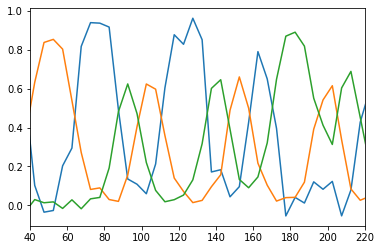

In [10]:
fig, ax = plt.subplots()

ax.plot(glub, y[0][7:45], glub, y[1][7:45], glub, y[2][7:45])

ax.set_xlim(40, 220)
ax.xaxis.set_major_locator(IndexLocator(base=12, offset=14.5))
ax.grid(which='major', axis='x', linewidth=3)

fig.set_figwidth(15)
fig.set_figheight(10)

plt.xlabel('Глубина')
plt.ylabel('Интенсивность, у.е.')
plt.show()

In [11]:
get_index_max_value = lambda i: i.argmax()

value_elem = []
for string in y.T:
    if get_index_max_value(string) == 0:
        value_elem += ['K']
    if get_index_max_value(string) == 1:
        value_elem += ['U']
    if get_index_max_value(string) ==2:
        value_elem += ['Th']

resalt = pd.DataFrame(np.vstack([np.array(x).reshape(1, 52), y]))
resalt = pd.DataFrame(np.vstack([resalt, np.array(value_elem).reshape(1, 52)]).T)

In [12]:
#resalt = resalt.iloc[8:45:2]
resalt = pd.DataFrame(resalt)
resalt[0] = resalt[0].astype(float)

In [18]:
start_depth = 40
stop_depth = 52

resalt_table = []
while stop_depth < 222.5:
    resalt1 = resalt[ resalt[0] > start_depth]
    resalt2 = resalt1[4][ resalt1[0] < stop_depth]
    
    row = [start_depth, stop_depth, resalt2.mode().values[0]]
    resalt_table += [row]

    start_depth += 12
    stop_depth += 12

resalt_table = pd.DataFrame(resalt_table, columns = ['Start Depth', 'Stop Depth', 'Element'])    
resalt_table


,Start Depth,Stop Depth,Element
0,40,52,U
1,52,64,U
2,64,76,K
3,76,88,K
4,88,100,Th
5,100,112,U
6,112,124,K
7,124,136,K
8,136,148,Th
9,148,160,U
